Field line following (J-TEXT)
=============================

In [1]:
import fusionsc as fsc
import numpy as np
import pyvista as pv

from fusionsc.devices import jtext

In [2]:
pv.set_jupyter_backend('static')

We use a 2D equilibrium as a baseline field

In [3]:
efitExample = jtext.exampleGeqdsk()
field = fsc.magnetics.MagneticConfig.fromEFit(efitExample).compute(jtext.defaultGrid())

Let's follow a field line (which gives us position and field values)

In [4]:
help(fsc.flt.followFieldlines)

Help on AsyncMethodDescriptor in module fusionsc.flt:

followFieldlines(points, config, recordEvery=1, **kwargs) -> Any
            Follows magnetic field lines.
            
            Mostly equivalent to :code:`(lambda x: return x["fieldLines"], x["fieldStrengths"])(trace(points, config, recordEvery, **kwargs))`.
            
            Parameters:
                    - points: Starting points for the trace. Can be any shape, but the first dimension must have a size of 3 (x, y, z).
                    - config: Magnetic configuration. If this is not yet computed, you also need to specify the 'grid' parameter.
                    - recordEvery: Number of tracing steps between each recorded point.
    
            Returns:
                    A tuple holding:
                    - An array of shape `points.shape     + [max. field line length]` indicating the field line point locations
                    - An array of shape `points.shape[1:] + [max. field line length]` indicating th

In [5]:
startPoint = [1.2, 0, 0]
fieldLine, b = fsc.flt.followFieldlines(startPoint, field, recordEvery = 10, stepSize = 0.01, turnLimit = 400)

Now we run Poincaré plots for a few different cases

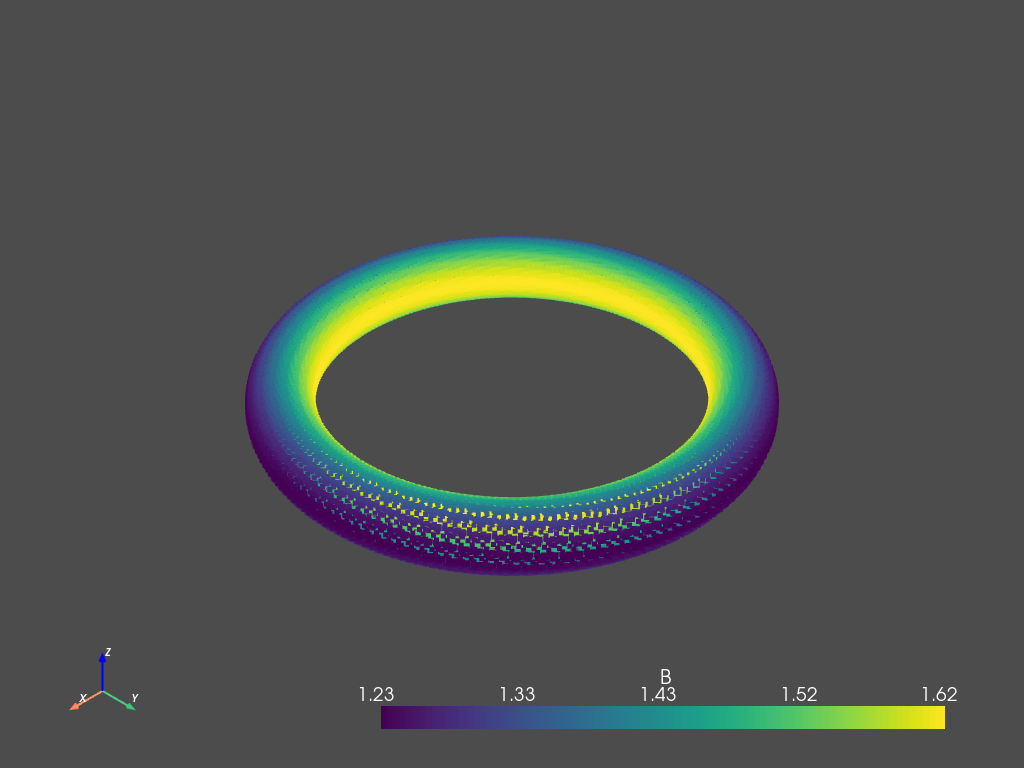

In [6]:
cloud = pv.PolyData(fieldLine.T)
cloud.point_data['B'] = b

pv.plot(cloud)

We can also interpolate a surface from the provided points. *Note:* This is a function provided by PyVista.

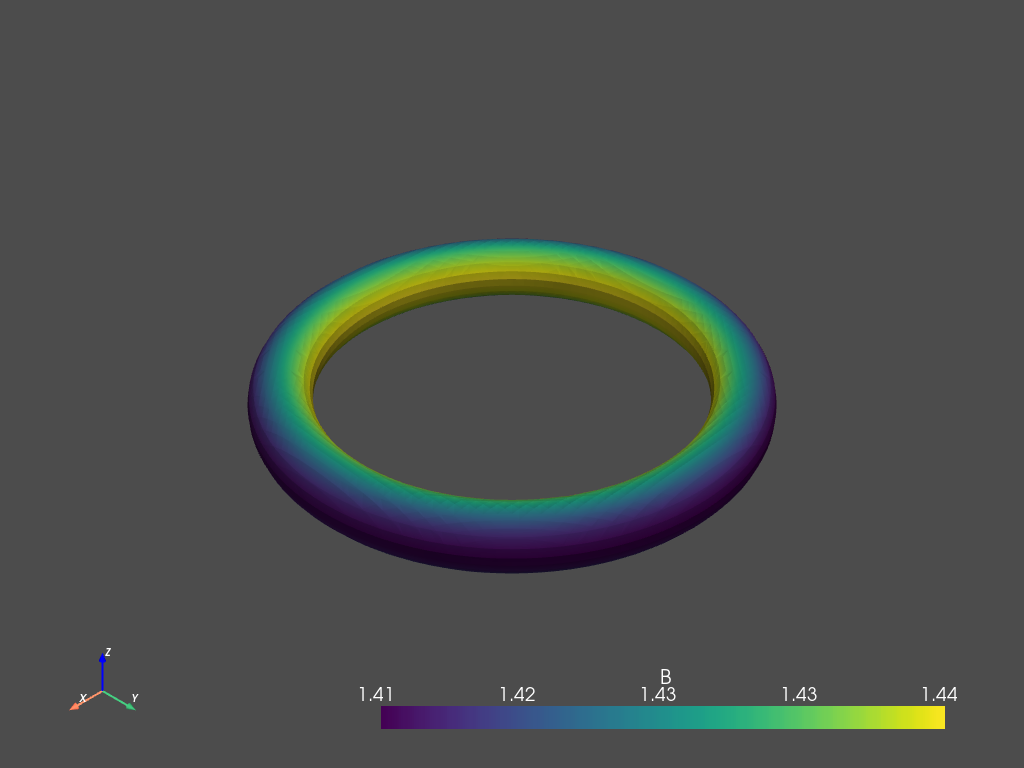

In [7]:
surf = cloud.reconstruct_surface().interpolate(cloud)
pv.plot(surf)